In [99]:
"DATA PREPARATION" 

'DATA PREPARATION'

In [100]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
# Importing the dataset
df = pd.read_excel('task2.xlsx', encoding='ISO-8859-1')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


C:\Users\ztnik\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


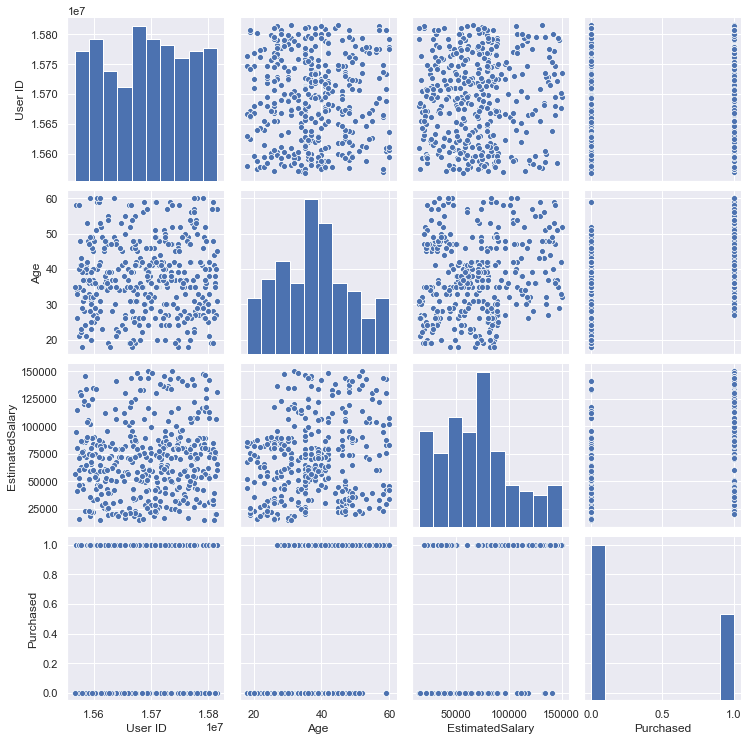

In [102]:
# Features distribution
import seaborn as sns
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();

In [103]:
# Cheking NaN
# Видим, что пропущенные значения отсутствуют
nan_by_column=df.isnull().sum()
print(nan_by_column)

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [104]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
df[['Gender']] = LabelEncoder().fit_transform(df[['Gender']])

C:\Users\ztnik\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [105]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [106]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [107]:
# Cheking correlations
df.corr()
# Значимымой переменной является Age

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [108]:
"Classification Neural Network" 

'Classification Neural Network'

In [128]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [129]:
# Для классификации в качестве зависимой переменной будет использовать последний столбец  "Purchased"
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 2:3].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [130]:
X

array([[19],
       [35],
       [26],
       [27],
       [19],
       [27],
       [27],
       [32],
       [25],
       [35],
       [26],
       [26],
       [20],
       [32],
       [18],
       [29],
       [47],
       [45],
       [46],
       [48],
       [45],
       [47],
       [48],
       [45],
       [46],
       [47],
       [49],
       [47],
       [29],
       [31],
       [31],
       [27],
       [21],
       [28],
       [27],
       [35],
       [33],
       [30],
       [26],
       [27],
       [27],
       [33],
       [35],
       [30],
       [28],
       [23],
       [25],
       [27],
       [30],
       [31],
       [24],
       [18],
       [29],
       [35],
       [27],
       [24],
       [23],
       [28],
       [22],
       [32],
       [27],
       [25],
       [23],
       [32],
       [59],
       [24],
       [24],
       [23],
       [22],
       [31],
       [25],
       [24],
       [20],
       [33],
       [32],
       [34],
       [18],

In [131]:
# Построим различные модели нейронных сетей для классификации, используя сужающие архитектуры

In [138]:
# Initialising the ANN 10-1
# На входном слое - 1 нейрон, так как выбрали 1 значимую переменную
cnn1 = Sequential()

# Adding the input layer and the first hidden layer
cnn1.add(Dense(units = 10, activation = 'relu', input_dim = 1))

# Adding the output layer
cnn1.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [139]:
# Fitting the ANN to the Training set
cnn1.fit(X_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 5.9435 - accuracy: 0.6250
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9220 - accuracy: 0.6250
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.9168 - accuracy: 0.6250
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7634 - accuracy: 0.5031
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.3719
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7188 - accuracy: 0.5813
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7174 - accuracy: 0.3719
Epoch 8/100
32/32 [==============================] - 0s 999us/step - loss: 0.7120 - accuracy: 0.6250
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7093 - accuracy: 0.4375
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7057 - accuracy: 0.4531
Epoch 1

32/32 [==============================] - 0s 935us/step - loss: 0.5329 - accuracy: 0.7719
Epoch 83/100
32/32 [==============================] - 0s 903us/step - loss: 0.5313 - accuracy: 0.7812
Epoch 84/100
32/32 [==============================] - 0s 935us/step - loss: 0.5275 - accuracy: 0.7937
Epoch 85/100
32/32 [==============================] - 0s 873us/step - loss: 0.5246 - accuracy: 0.7969
Epoch 86/100
32/32 [==============================] - 0s 935us/step - loss: 0.5324 - accuracy: 0.7500
Epoch 87/100
32/32 [==============================] - 0s 935us/step - loss: 0.5211 - accuracy: 0.8094
Epoch 88/100
32/32 [==============================] - 0s 873us/step - loss: 0.5166 - accuracy: 0.8031
Epoch 89/100
32/32 [==============================] - 0s 904us/step - loss: 0.5189 - accuracy: 0.7719
Epoch 90/100
32/32 [==============================] - 0s 935us/step - loss: 0.5192 - accuracy: 0.7844
Epoch 91/100
32/32 [==============================] - 0s 935us/step - loss: 0.5141 - accuracy: 

In [140]:
# Predicting the Test set results
y_pred = cnn1.predict(X_test)
y_pred = (y_pred > 0.5)

In [141]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[37 20]
 [ 3 20]]


In [142]:
# 23 значений были ошибычны

In [143]:
# Initialising the ANN 15-1
# На входном слое - 1 нейрон, так как выбрали 1 значимую переменную
cnn1 = Sequential()

# Adding the input layer and the first hidden layer
cnn1.add(Dense(units = 15, activation = 'relu', input_dim = 1))

# Adding the output layer
cnn1.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [144]:
# Fitting the ANN to the Training set
cnn1.fit(X_train, y_train, batch_size = 10, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 6.6543 - accuracy: 0.3750
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0766 - accuracy: 0.3750
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.5944 - accuracy: 0.3750
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6562
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6725 - accuracy: 0.6500
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.6250
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.7437
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.6250
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6628 - accuracy: 0.7250
Epoch 10/100
32/32 [==============================] - 0s 935us/step - loss: 0.6583 - accuracy: 0.6750
Epoch 1

32/32 [==============================] - 0s 997us/step - loss: 0.5290 - accuracy: 0.8000
Epoch 83/100
32/32 [==============================] - 0s 997us/step - loss: 0.5258 - accuracy: 0.8000
Epoch 84/100
32/32 [==============================] - 0s 997us/step - loss: 0.5249 - accuracy: 0.8188
Epoch 85/100
32/32 [==============================] - 0s 936us/step - loss: 0.5220 - accuracy: 0.8094
Epoch 86/100
32/32 [==============================] - 0s 965us/step - loss: 0.5179 - accuracy: 0.8219
Epoch 87/100
32/32 [==============================] - 0s 967us/step - loss: 0.5211 - accuracy: 0.7781
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5183 - accuracy: 0.7781
Epoch 89/100
32/32 [==============================] - 0s 966us/step - loss: 0.5179 - accuracy: 0.8156
Epoch 90/100
32/32 [==============================] - 0s 966us/step - loss: 0.5255 - accuracy: 0.7875
Epoch 91/100
32/32 [==============================] - 0s 936us/step - loss: 0.5149 - accuracy: 0.

In [145]:
# Predicting the Test set results
y_pred = cnn1.predict(X_test)
y_pred = (y_pred > 0.5)

In [146]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[53  4]
 [ 6 17]]


In [ ]:
10 значений ошибочны
Следовательно, сеть с архитектурой 15-1-1 лучше